<a href="https://colab.research.google.com/github/Mohamed-Maher5/Supervised-Machine-Learning/blob/main/Classification%20Logistic-Regression/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Import Libraries***

In [ ]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Model Selection
from sklearn.model_selection import train_test_split

## Model balance
from imblearn.over_sampling import RandomOverSampler

## Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix

## Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import cross_val_score

## Models
from sklearn.linear_model import SGDClassifier

**Study the dataset**

In [ ]:
file_path = '/content/diabetes.csv'
diabetes_dataset = pd.read_csv(file_path)

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
## check the info (nulls and datatypes)
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
## some statistics of the dataset
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
## check the nulls
diabetes_dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

WE CAN SEE THERE IS NO NULL VALUES

**Exploratory Data Analysis (EDA)**

In [ ]:
outcome_values = diabetes_dataset['Outcome'].value_counts()
outcome_values

0    500
1    268
Name: Outcome, dtype: int64

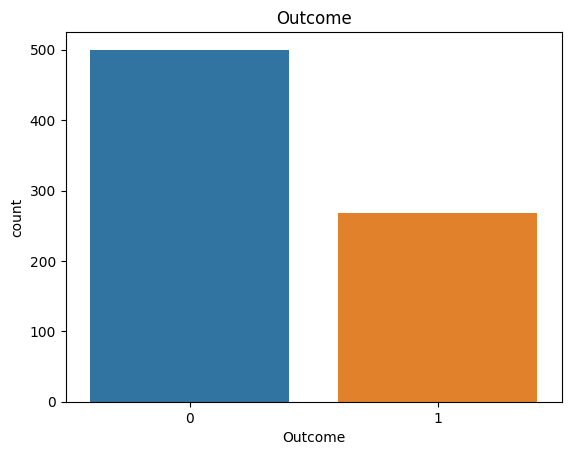

In [ ]:
sns.countplot(data=diabetes_dataset, x='Outcome')
plt.title('Outcome')
plt.show()

It shows the number of data points that fall within each bin --



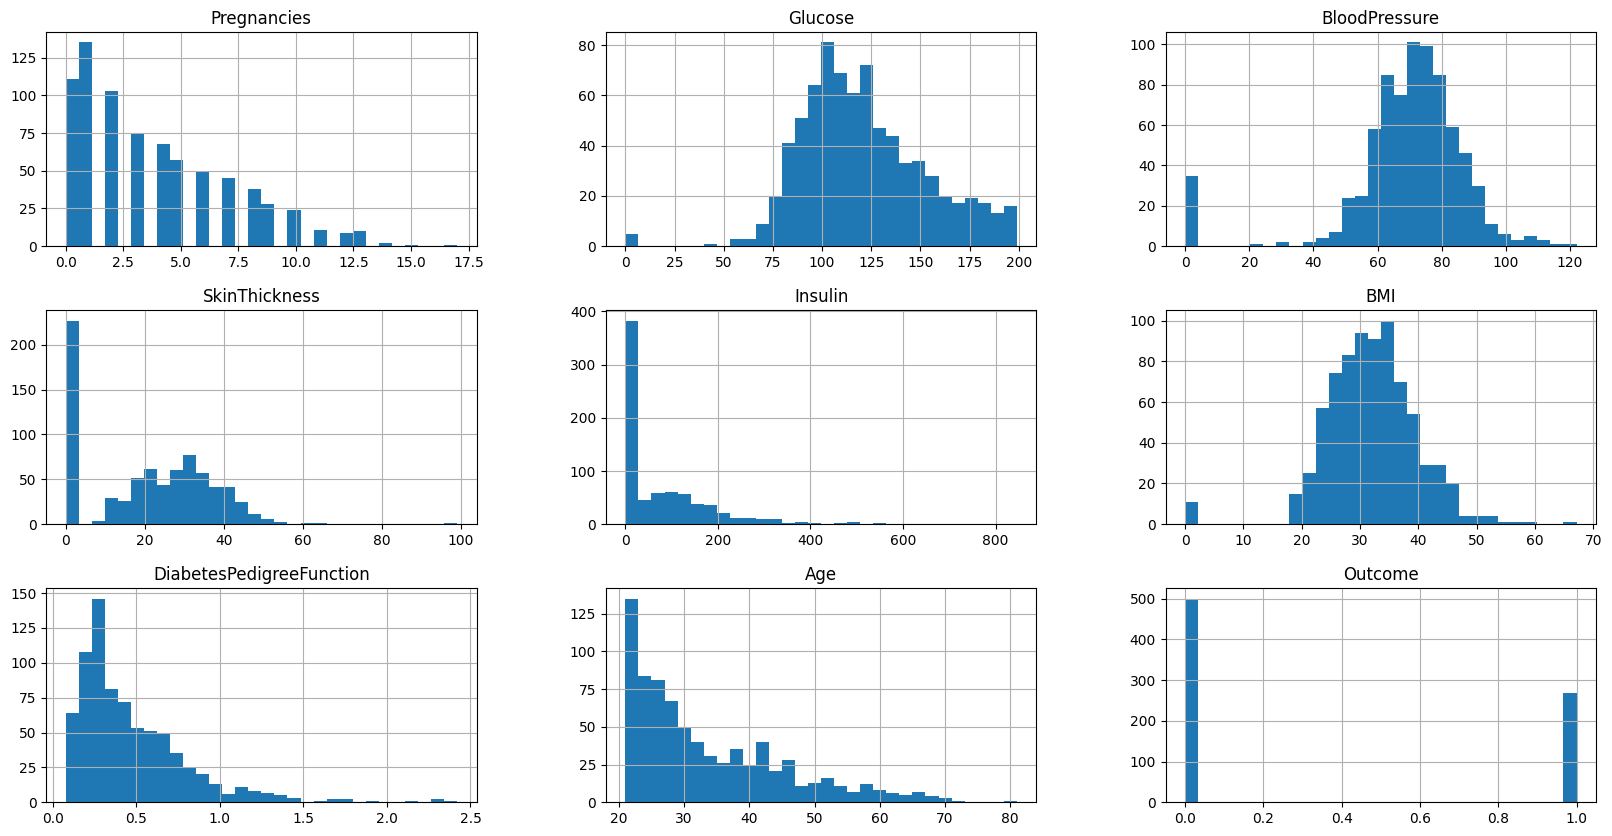

In [ ]:
## Histogram Distribution of Numerical Variables in Dataset
print('It shows the number of data points that fall within each bin --\n')
diabetes_dataset.hist(bins=30, figsize=(20,10))
plt.show()

<Axes: xlabel='Glucose', ylabel='BMI'>

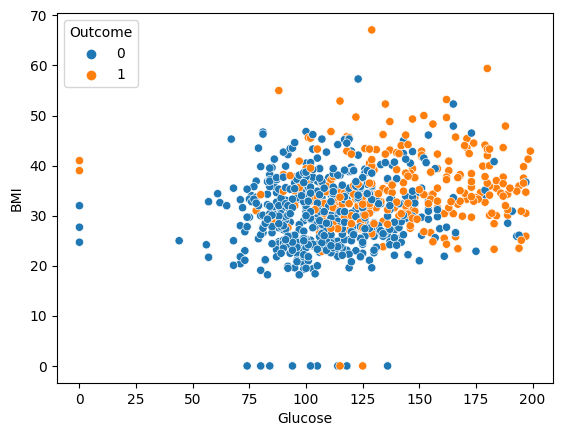

In [ ]:
# Create the scatter plot
sns.scatterplot(x=diabetes_dataset['Glucose'], y=diabetes_dataset['BMI'], hue=diabetes_dataset['Outcome'])

**Check the Correlation between the Features and the Target**

In [ ]:
## Correlations
diabetes_dataset.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

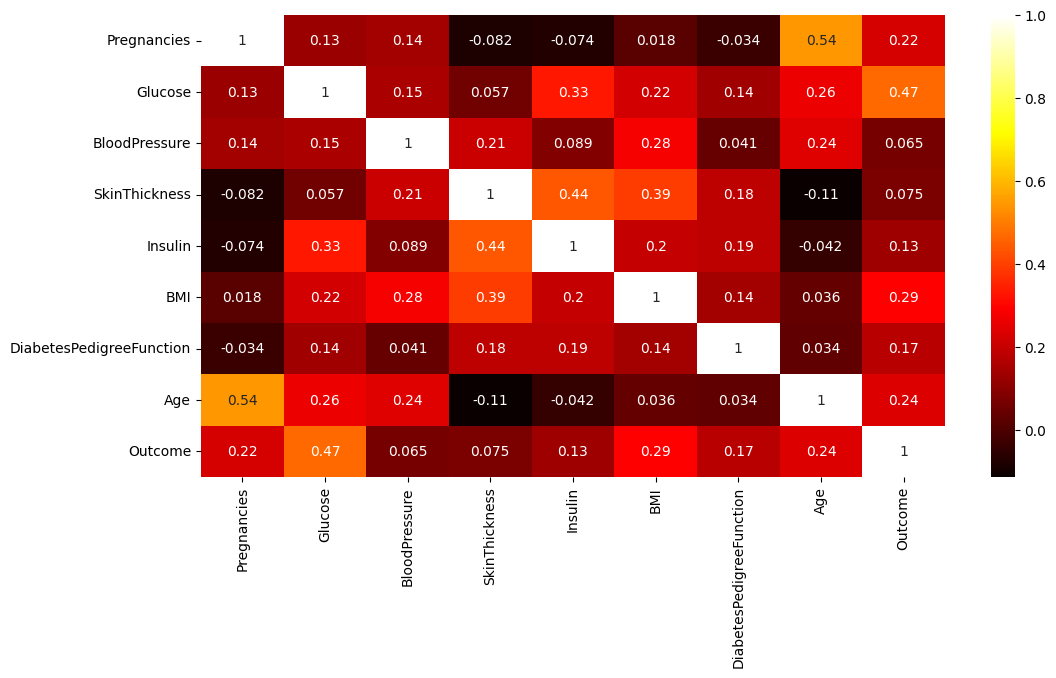

In [ ]:
## heatmap to explain the corelations more
plt.figure(figsize=(12, 6))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='hot')
plt.show()

**Feature Engineering**

In [ ]:
## Feature Engineering --> Feature Extraction --> increase your dataset with Important Features --> Add the new column to the main DF
diabetes_dataset['Age_per_Pregnancies'] = diabetes_dataset['Age'] / diabetes_dataset['Pregnancies']
diabetes_dataset['Glucose_per_BloodPressure'] = diabetes_dataset['Glucose'] / diabetes_dataset['BloodPressure']
diabetes_dataset['DiabetesPedigreeFunction_per_Age'] = diabetes_dataset['DiabetesPedigreeFunction'] / diabetes_dataset['Age']

In [ ]:
## check the correlation again
diabetes_dataset.corr()['Outcome'].sort_values(ascending=False)  ## some progress for out new features (very good)

Outcome                             1.000000
Glucose                             0.466581
Glucose_per_BloodPressure           0.309978
BMI                                 0.292695
Age                                 0.238356
Pregnancies                         0.221898
DiabetesPedigreeFunction            0.173844
Insulin                             0.130548
SkinThickness                       0.074752
BloodPressure                       0.065068
DiabetesPedigreeFunction_per_Age    0.054470
Age_per_Pregnancies                -0.083832
Name: Outcome, dtype: float64

**Split the Dataset**

In [ ]:
## Split the dataset into features and target
X = diabetes_dataset.drop(columns=['Outcome'], axis=1)  ## features
y = diabetes_dataset['Outcome']  ## target

In [ ]:
## convert the float64 values to float32
X = X.astype(np.float32)

In [ ]:
## Remove the NaN Values
X[np.isinf(X)] = np.nan

In [ ]:
## Balancing the Data
ros = RandomOverSampler(random_state = 0)
X , y = ros.fit_resample(X,y)

In [ ]:
## Split Data into Train_Full and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

## Data shapes
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (800, 11)
y_train shape --  (800,)
X_test shape --  (200, 11)
y_test shape --  (200,)


**PreProcessing Data**

In [ ]:
## Let's impute (although there is no nulls) and standardize the Dataset ---> All in Pipeline
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())])

## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train = pd.DataFrame(num_pipline.fit_transform(X_train))
X_test = pd.DataFrame(num_pipline.transform(X_test))

**Model Selection**

In [ ]:
sgd_clas = SGDClassifier(loss='log', penalty='l1', alpha=0.001, max_iter=50000, shuffle=True)
sgd_clas.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(alpha=0.001, loss='log', max_iter=50000, penalty='l1')

In [ ]:
## Prediction
y_pred = sgd_clas.predict(X_train)
## accuracy score
print('Accuracy Scores in training data -- ', accuracy_score(y_train, y_pred))

print('--'*30)

## If you want to use cross validation
scores_acc = cross_val_score(estimator=sgd_clas, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print('Accuracy Scores using cross validation -- ', scores_acc.mean())

Accuracy Scores in training data --  0.7575
------------------------------------------------------------
Accuracy Scores using cross validation --  0.7587500000000001


**Evaluate the Model**

In [ ]:
# Make predictions
predictions = sgd_clas.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.72


In [ ]:
## Precision and Recall score
precison_score = precision_score(y_test, predictions)
print('Precison Score using SGD =>', precison_score)

print('---'*20)

recall_score_knn = recall_score(y_test, predictions)
print('Recall Score using SGD =>', recall_score_knn)

print('---'*20)

class_repo = classification_report(y_test, predictions)
print('Classifcation Report using SGD => \n', class_repo)

Precison Score using SGD => 0.7169811320754716
------------------------------------------------------------
Recall Score using SGD => 0.7450980392156863
------------------------------------------------------------
Classifcation Report using SGD => 
               precision    recall  f1-score   support

           0       0.72      0.69      0.71        98
           1       0.72      0.75      0.73       102

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



<Axes: >

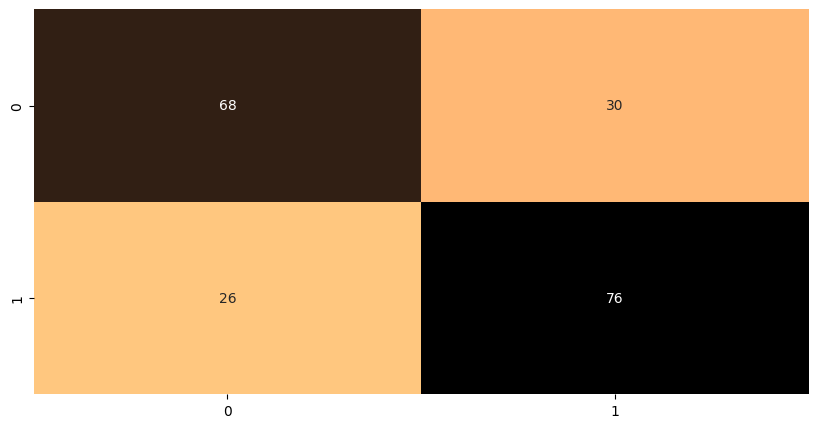

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,cmap="copper_r",fmt="d",cbar=False,ax=ax)